(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


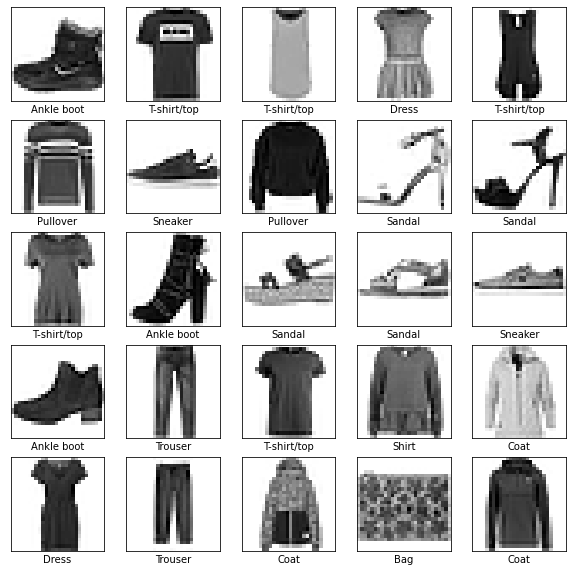

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

def show_image_grids(train_images, train_labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

if __name__ == '__main__':
    fashion_mnist = keras.datasets.fashion_mnist #直接從TensorFlow中導入和加載Fashion MNIST數據
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    print(train_images.shape)
    print(train_labels.shape)
    print(test_images.shape)
    print(test_labels.shape)
    
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    show_image_grids(train_images, train_labels) 

    '''plt.figure()
    plt.imshow(train_images[3])
    plt.colorbar()
    plt.grid(False)
    plt.show()'''
    

 

In [5]:
# Steps 3~8
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = TensorBoard(log_dir='log_fashion')

checkpoint_path = "ckpt_fashion/cp-{epoch:04d}.ckpt"
cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True,verbose=1, period=5)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Steps 9, 10
model.fit(train_images, train_labels,batch_size=32, epochs=20, callbacks =[cp_callback, tb_callback])

#test_loss, test_acc = model.evaluate(test_images, test_labels)
#print('\nTest accuracy:', test_acc)
model.evaluate(test_images, test_labels)

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4974 - accuracy: 0.8247
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3775 - accuracy: 0.8640
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3395 - accuracy: 0.8770
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3147 - accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - ETA: 0s - loss: 0.2963 - accuracy: 0.8900
Epoch 5: saving model to ckpt_fashion\cp-0005.ckpt
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2963 - accuracy: 0.8900
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2792 - accuracy: 0.8972
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.9014
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2573 - accuracy: 0.9052
Epoch 9/20
1875/1875 [=======================

[0.3686157763004303, 0.8834999799728394]

In [5]:
 # Step 12
print('epochs_0020  = ')
model.load_weights('ckpt_fashion/cp-0020.ckpt')
loss, acc = model.evaluate(test_images, test_labels)
  

epochs_0020  = 
313/313 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8863


In [6]:
 # Step 13
 prob = model.predict(test_images)
 prob.shape = (10000,10)
 #print(prob[1,:])
 predictions = np.zeros(10000)
 #print(np.argmax(prob[5,:]))
 cor = 0
 for i in range(10000):
    predictions[i] = np.argmax(prob[i,:])
    if predictions[i] == test_labels[i]:
        cor += 1
    #cor = sum(predictions == test_labels) 此方法較慢
 acc = cor/10000
 print('test_acc = ',acc )
 
 

test_acc =  0.8863


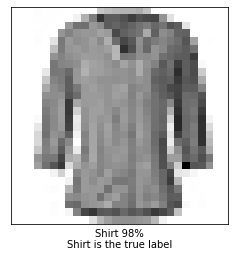

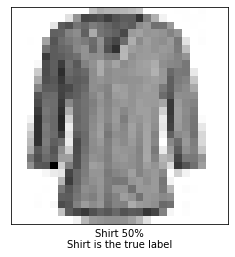

In [7]:
#step 14
prob = model.predict(test_images[4:5])
plt.grid(False)
plt.xticks([])
plt.yticks([])
#print(prob)
plt.imshow(test_images[4], cmap=plt.cm.binary)
description = np.argmax(prob)
plt.xlabel(class_names[description]+' '+str(round(prob[0,description]*100))+'%\n'+'Shirt is the true label')
plt.show()


prob = model.predict(np.fliplr(test_images[4:5]))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(np.fliplr(test_images[4]), cmap=plt.cm.binary)
description = np.argmax(prob)
plt.xlabel(class_names[description]+' '+str(round(prob[0,description]*100))+'%\n'+'Shirt is the true label')
plt.show()

dict_keys(['loss', 'accuracy'])


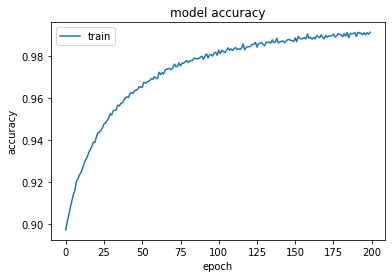

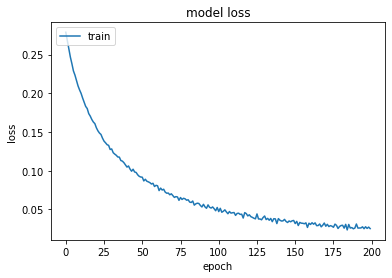

In [8]:
model.load_weights('ckpt_fashion/cp-0005.ckpt')
# Fit the model
history = model.fit(train_images,train_labels, epochs=200, batch_size=32, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [9]:
# 1. How many training epochs in model.fit() are required such that the training loss is converged? (epochs=20 其實還未收斂，需畫出 loss vs. epochs 曲線) 
# Write down your observations here.
#從圖形可以看出從epoch大約150~175後開始收斂

In [10]:
# 2. Adjust the batch_size in model.fit(). What will happen if we change batch_size from 32 to 512? (訓練時間是增加或減少？測試正確率是上升或下降？原因為何？)
# Write down your observations here.
# 訓練時間減少，batch_size數字提高，代表一次訓練的個數增加，會更減少時間。準確率的話則不一定。

In [11]:
# 3. What is the difference between the following two options in model.compile()? 
#	loss='categorical_crossentropy'
#	loss='sparse_categorical_crossentropy'
# Use an example to illustrate the difference.

#categorical_crossentropy和sparse_categorical_crossentropy只不過是輸入參數target類型上的區別，sparse_categorical_crossentropy為一維categorical_crossentropy則是二維，其loss的計算在本質上沒有區別，就是交叉熵；二者是針對多分類（Multi-class）的。
#example:如果樣本標籤是one-hot編碼，則用categorical_crossentropy函數one-hot 編碼：[0, 0, 1], [1, 0, 0], [0, 1, 0]
#如果樣本標籤是數字編碼，則用sparse_categorical_crossentropy函數 ,數字編碼：2, 0, 1
